<a href="https://colab.research.google.com/github/EwoutH/Helsinki-flood-BEP-project/blob/main/road-graph/OSMnx_road_graph_plots_BEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 3 of 3
* First part: https://colab.research.google.com/drive/1DE6MA7E2gOwGp7m35fzvrv5HQgdS3UQT
* Second part: https://colab.research.google.com/drive/1mXfn0s-OZCvbg_3cIWoRvQQ5ooMo9Cfj

### Installation

Note that OSMnx is installed from my [own branch](https://github.com/EwoutH/osmnx/tree/edge-sum-refactor-2) with slight modification to the `travel_time` calculation. See [gboeing/osmnx#721](https://github.com/gboeing/osmnx/pull/721).

In [ ]:
pip install -e git+https://github.com/EwoutH/osmnx.git@edge-sum-refactor-2#egg=OSMnx

Obtaining OSMnx from git+https://github.com/EwoutH/osmnx.git@edge-sum-refactor-2#egg=OSMnx
  Updating ./src/osmnx clone (to revision edge-sum-refactor-2)
  Running command git fetch -q --tags
  Running command git reset --hard -q b519b4bb178dce35c9197d227997e912b3ed401e
  Found existing installation: osmnx 1.1.1
    Can't uninstall 'osmnx'. No files were found to uninstall.
  Running setup.py develop for OSMnx


In [ ]:
pip install ./src/osmnx

Processing ./src/osmnx
  Created wheel for osmnx: filename=osmnx-1.1.1-cp37-none-any.whl size=93657 sha256=d65800a7895c7d246b4e0da274827eabe40109ca9447906aeb67f20f0863c4a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qshf21ht/wheels/43/a0/b3/5627d0ffe743765b2a32057b8ce416e7bc03a7e0f8560005b3
Successfully built osmnx
  Found existing installation: osmnx 1.1.1
    Can't uninstall 'osmnx'. No files were found to uninstall.


In [ ]:
pip install contextily

     |████████████████████████████████| 19.3MB 320kB/s 


In [ ]:
# Import packages
import networkx as nx
import geopandas as gpd
import contextily as cx
import pandas as pd
import numpy as np
import osmnx as ox
#import igraph as ig
import random

# Print versions
print(f'NetworkX version {nx.__version__}')
print(f'GeoPandas version {gpd.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'NumPy version {np.__version__}')
print(f'OSMnx version {ox.__version__}')
#print(f'igraph version {ig.__version__}')

NetworkX version 2.5.1
GeoPandas version 0.9.0
Pandas version 1.1.5
NumPy version 1.19.5
OSMnx version 1.1.1


The following files are required:
* `road-graph-def.graphml`
* `central_flooded_edges-12-tte-rs.csv`
* `central_flooded_edges-12-tti-rs.csv`

Available on https://github.com/EwoutH/Helsinki-flood-BEP-project

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("drive/MyDrive/BEP Flood Resilience/Data")

Mounted at /content/drive


### Graph

In [ ]:
# Load the MultiDiGraph and convert to DiGraph
ntypes = {'street_count': int, 'lon': float, 'lat': float, 'betw_cent': float}
etypes = {'min_lanes': int, 'oneway': bool, 'length': float, 'free_flow_speed': float,
          'free_flow_time': float, 'free_flow_capacity': int, 'edge_betw_cent': float}

G2b = ox.io.load_graphml('road-graph-def.graphml',edge_dtypes=etypes)
G2a = ox.utils_graph.get_digraph(G2b,weight='free_flow_time')

# Confirm network types
print(type(G2b))
print(type(G2a))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'networkx.classes.digraph.DiGraph'>


In [ ]:
# Load nodes and edges as GeoPandas Dataframes to be able to observe and plot them
nodes, edges = ox.graph_to_gdfs(G2b, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

### Import CSVs

In [ ]:
import ast

In [ ]:
central_tte = pd.read_csv('central_flooded_edges-12-tte-rs.csv', index_col=[0], skipinitialspace=True)
central_tti = pd.read_csv('central_flooded_edges-12-tti-rs.csv', index_col=[0], skipinitialspace=True)

In [ ]:
rain = ['0', '44', '54', '71', '86', '20', '198']
plot_dict = {}
for i in rain:
  plot_dict[i] = central_tte.nlargest(12,i)[i].to_dict()
  plot_dict[i] = {ast.literal_eval(k):v for (k,v) in plot_dict[i].items()}

In [ ]:
plot_dict['44']

{(49, 1040): 66095.35410591183,
 (149, 150): 47956.52166444758,
 (150, 153): 54074.87076075577,
 (165, 160): 46850.36255774003,
 (331, 1688): 46397.953962632775,
 (381, 331): 46509.87650575237,
 (1039, 1038): 67447.455287696,
 (1543, 1777): 88889.37499926426,
 (1636, 159): 51679.24770973165,
 (1638, 1342): 50170.013450810045,
 (1687, 35): 51986.53604327735,
 (1777, 314): 88958.24185762672}

In [ ]:
edge_cent = nx.algorithms.centrality.edge_betweenness_centrality(G2a, weight="free_flow_time")

In [ ]:
edge_cent

{(0, 140): 0.004332448129157895,
 (0, 1): 0.0045331960534422955,
 (140, 143): 0.0,
 (140, 2470): 0.004661148565123194,
 (140, 134): 0.0014348319621786724,
 (140, 0): 0.004572658043026125,
 (1, 142): 0.004774601785176701,
 (1, 0): 0.004292238753407707,
 (142, 1): 0.004532897098975751,
 (142, 2): 0.005022136083475261,
 (2, 19): 0.005216605963962235,
 (2, 180): 0.00013153996527942824,
 (2, 142): 0.0047796840111079516,
 (19, 25): 0.006323185921875424,
 (19, 178): 0.0004001505534693516,
 (19, 100): 0.009592551968002305,
 (19, 2): 0.0049756486639276455,
 (180, 19): 0.0003417049552599693,
 (180, 178): 0.00039372303243865225,
 (180, 2): 0.00012929780678034707,
 (3, 4): 0.002662189524575701,
 (3, 11): 0.0003808679903772536,
 (4, 844): 0.002663833774141694,
 (844, 2127): 0.0026645811603080542,
 (5, 9): 0.001177432166484155,
 (5, 1026): 0.0028412632500356503,
 (9, 1028): 0.001802247001561439,
 (9, 1026): 0.0002002994925845839,
 (9, 1027): 0.0030920860474661963,
 (1026, 3): 0.0030423101287865946,


In [ ]:
plot_dict['44']

{(49, 1040): 66095.35410591183,
 (149, 150): 47956.52166444758,
 (150, 153): 54074.87076075577,
 (165, 160): 46850.36255774003,
 (331, 1688): 46397.953962632775,
 (381, 331): 46509.87650575237,
 (1039, 1038): 67447.455287696,
 (1543, 1777): 88889.37499926426,
 (1636, 159): 51679.24770973165,
 (1638, 1342): 50170.013450810045,
 (1687, 35): 51986.53604327735,
 (1777, 314): 88958.24185762672}

In [ ]:
nx.set_edge_attributes(G2a, plot_dict['44'], name='central44')

In [ ]:
x = ox.plot.get_edge_colors_by_attr(G2a, 'central44')

In [ ]:
G2b = nx.MultiDiGraph(G2a)
nodes, edges = ox.graph_to_gdfs(G2b, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

In [ ]:
edges['central44'] = edges['central44'].fillna(0)

In [ ]:
cx.providers.Esri.keys()

dict_keys(['WorldStreetMap', 'DeLorme', 'WorldTopoMap', 'WorldImagery', 'WorldTerrain', 'WorldShadedRelief', 'WorldPhysical', 'OceanBasemap', 'NatGeoWorldMap', 'WorldGrayCanvas'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('hot_r')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='hot_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Trying to register the cmap 'hot_alpha' which already exists.
  app.launch_new_instance()


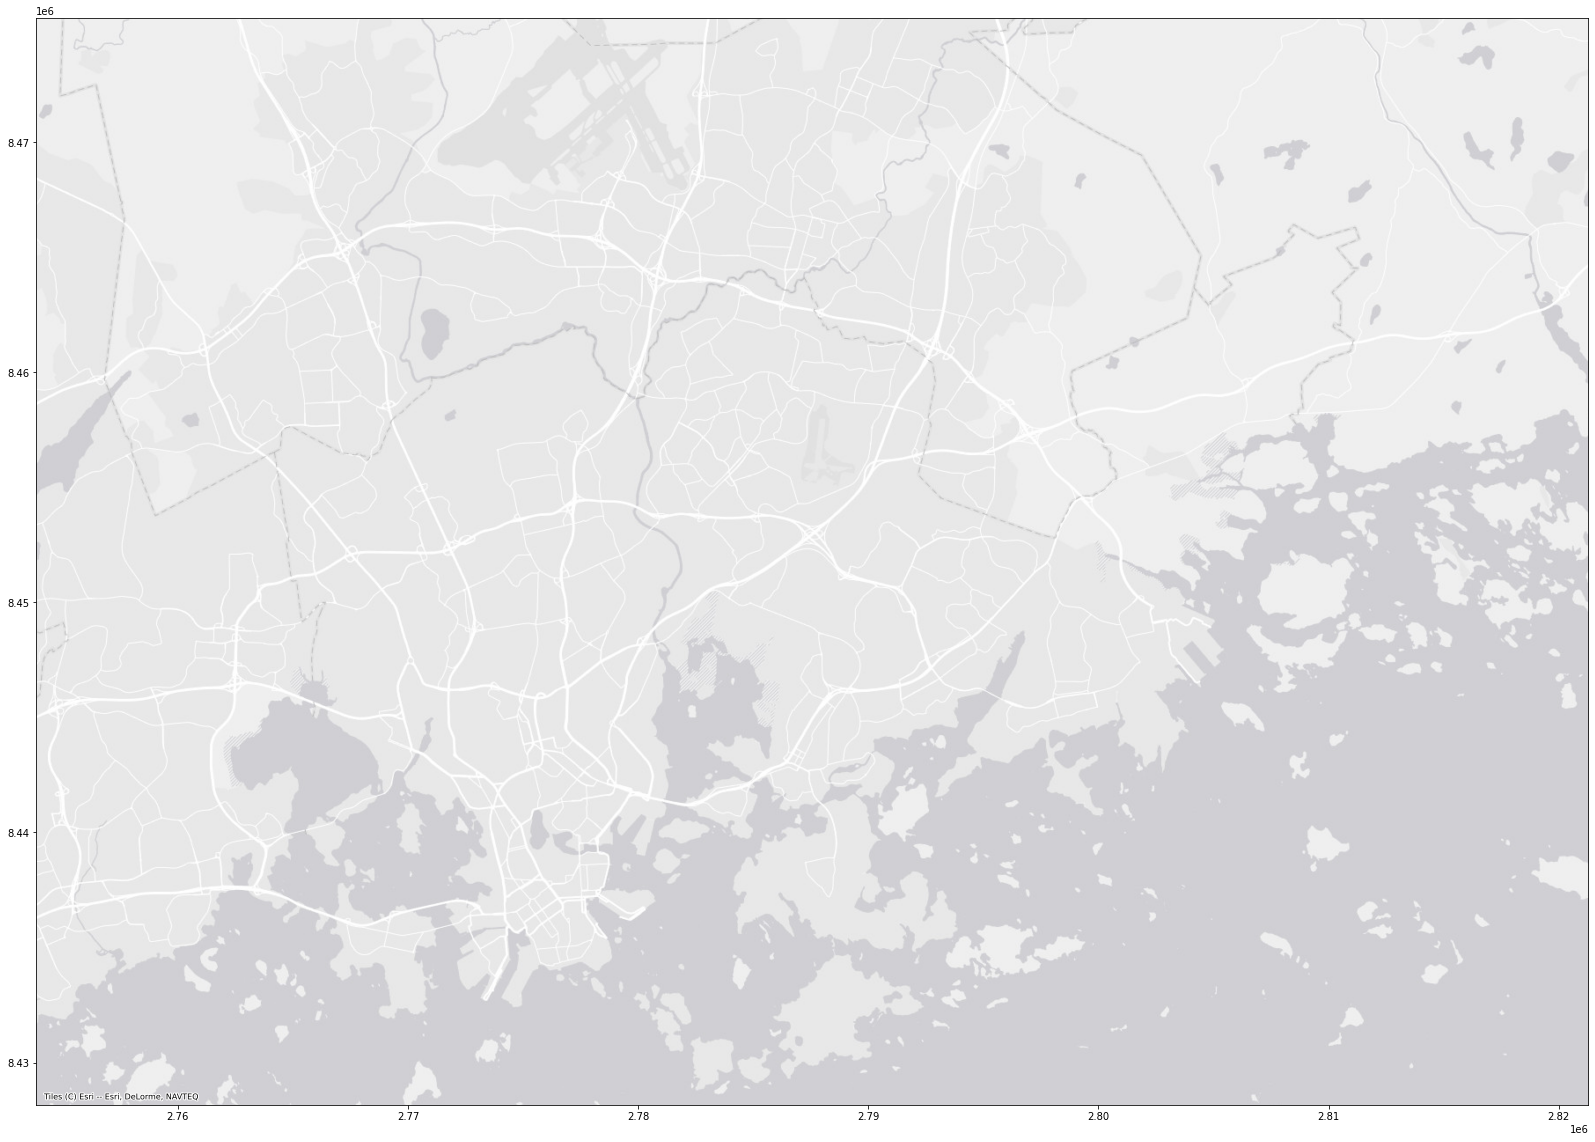

In [ ]:
edges = edges.to_crs(epsg=3857)
ax = edges.plot(column='central44', cmap="hot_alpha", figsize=(36,20), legend=False)
cx.add_basemap(ax, source=cx.providers.Esri.WorldGrayCanvas)